In [115]:
%matplotlib inline
import numpy as np

In [62]:
class Operation():
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
    def compute(self):
        pass


In [63]:
class add(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [64]:
class multiply(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [65]:
class matmul(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

In [66]:
class Placeholder():
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [67]:
class Variable():
    def __init__(self, initial_value = None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [68]:
class Graph():
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph 
        _default_graph = self

In [69]:
g = Graph()

In [70]:
g.set_as_default()

In [71]:
A = Variable(10)

In [72]:
b = Variable(1)

In [73]:
x = Placeholder()

In [75]:
y = multiply(A,x)

In [76]:
z = add(y, b)

In [79]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [106]:
class Session():
    def run(self, operation, feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
            else: #operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [107]:
sess = Session()

In [111]:
result = sess.run(operation=z, feed_dict={x:1})
result

11

In [117]:
g = Graph()
g.set_as_default()

A = Variable([[10,20], [30,40]])
b = Variable([1,2])

x = Placeholder()
y = matmul(A,x)
z = add(y,b)

In [120]:
sess = Session()
sess.run(operation=z, feed_dict={x:10})

array([[101, 202],
       [301, 402]])

# Classification

In [126]:
import matplotlib.pyplot as plt

In [123]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [124]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)

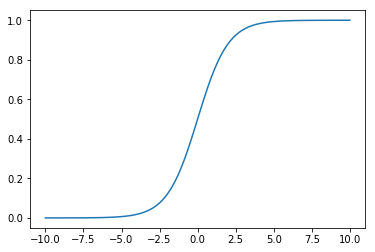

In [130]:
plt.plot(sample_z, sample_a)

In [133]:
class Sigmoid(Operation):
    def __init__(self,z):
        super().__init__([z])
        
    def compute(self, z_val):
        return 1 / (1 + np.exp(-z_val))

In [134]:
from sklearn.datasets import make_blobs

In [137]:
data = make_blobs(n_samples= 50,n_features=2, centers=2, random_state=75)

In [138]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [139]:
type(data)

tuple

In [146]:
data[0]

array([  9.36149154,   8.74906102,  -8.85885722,   7.72520389,
         8.80878209,   9.50899462,  10.1026025 ,   7.28046702,
         9.46968531,  -8.17089971,  -9.04982817,   7.04533624,
         9.0272212 ,  -9.86956281,   7.986659  ,  -7.50486114,
        -6.74473432,  -8.85261704,  -9.55928542,  -9.78471782,
         9.01706723,   8.33356412,   7.87489634,  -7.50953708,
        -7.24386675,   7.05124418,   9.23493842,  -9.5920878 ,
        -8.10517372,   9.35409538,  -7.98873571,  -9.50169117,
         9.26709393,  10.78862346,  -9.00301023,  -8.6849493 ,
        -7.25918415,   7.15201886,  -8.1648251 ,   9.77705761,
         8.85834104,  -7.66278316,  -8.43841416,   7.85483418,
         8.75248232, -11.69999644,  -9.51908883,  -7.2710667 ,
        -7.51956557,  11.90419283])

In [142]:
features = data[0]
labels = data[1]

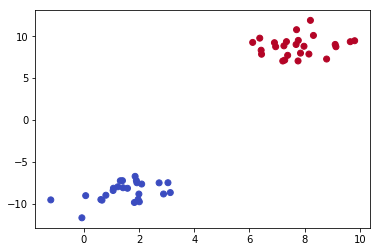

In [147]:
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='coolwarm')

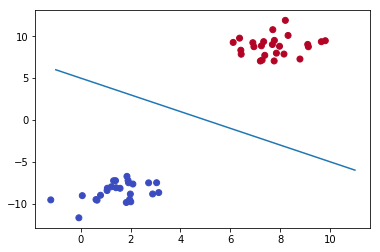

In [150]:
x = np.linspace(-1, 11, 11)
y = -x + 5
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='coolwarm')
plt.plot(x,y)

## (1,1) * f - 5 = 0

In [153]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [156]:
np.array([1,1]).dot(np.array([[4],[-10]])) - 5

-6

In [157]:
g = Graph()
g.set_as_default()

In [158]:
x = Placeholder()

In [159]:
w = Variable([1,1])

In [160]:
b = Variable(-5)

In [161]:
z = add(matmul(w,x), b)

In [162]:
a = Sigmoid(z)

In [168]:
sess = Session()
sess.run(operation = a, feed_dict={x:[0,0]})

0.0066928509242848554